## The Eighth Lab-assignment (08/09/2022 11:59'AM' - 08/12/2022 11:59PM, 50 points in total)

The purpose of this assignment is to practice different Hypothesis Testing and annotation quality evaluation.

### Question 1 (10 points) 

During the 1980s, the general consensus is that about 5% of the nation’s children had autism. Some claimed that increases certain chemicals in the environment has led to an increase in autism. 

(1) Write an appropriate hypothesis test for this situation (5 points).  

(2) Give an appropriate test for this hypothesis, stating what are the necessary conditions for performing the test (5 points). 

(3) A recent study examined 384 children and found that 46 showed signs of autism. Perform a test of the hypothesis and state the p-value (5 points). 

(1)Ho:p=0.05

vs

H1:p>0.05

(2)The test to conduct is one sample test of proportions. The test statistic is given by:

-Po
Z=      Po(1 – po/n

z is test statistic

p̂ is observed proportion

P0 is hypothesized probability

n is sample size.

Procedure:

1.State the null hypothesis and alternative hypothesis

2.State alpha, in other words determine the significance level

3.Compute the test statistic

4.Determine the critical value (from critical value table)

5.Define the rejection criteria

6.Finally, interpret the result. If the test statistic falls in critical region, reject the null hypothesis.

(c)Given,

\hat{p}=46/384=0.11979

n=384

P0=0.05

Plugging in all values in formula ,we get

So test statistic=6.274

At significance level of 0.05,p-value at z score of 6.274 is <0.0001

Since p value <0.05,we rejejct the null hypothesis at significance level of 5 %.

reject null hypothesis that population proportion = 0.05

In [ ]:
# your code here




### Question 2 (10 points) 
In this problem,we will examine the sugar content of several national brands of cereals, here measured as a percentage of weight.

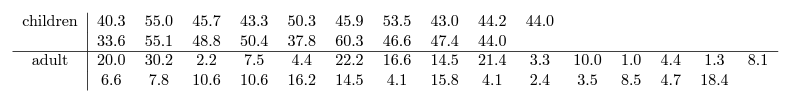

(1) Give a summary of these two datasets (5 points). 

(2) Create side-by-side boxplots and interpret what you see (5 points). 

(3) Use python to create a 95% confidence interval for the difference in mean sugar content and explain your result (5 points). 

In [ ]:
children = [ 40.3,55.0,45.7,43.4,50.3,45.9,53.5,43.0,4.2,44.0,33.6,55.1,48.8,50.4,37.8,60.3,46.6,47.4,44.0]
adult = [20.0,30.2,2.2,7.5,4.4,22.2,16.6,14.5,21.4,3.3,10.0,1.0,4.4,1.3,8.1,6.6,7.8,10.6,10.6,16.2,14.5,4.1,2.4,3.5,8.5,4.7,18.4]


import pandas as pd
import matplotlib.pyplot as plot
df=pd.DataFrame(list(zip(children,adult)),columns=['children','adult'])

df.describe()


In [ ]:
# your code here
my_dict = {'children': children, 'adult': adult}

fig, ax = plot.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plot.show()


In [ ]:
from scipy import stats
stats.ttest_ind(adult,children)

### Question 3 (30 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab08-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [ ]:
# your code here
import pandas as pd
import numpy as np
from sklearn.metrics import *
from statsmodels.stats.inter_rater import fleiss_kappa

def coh(y1, y2, *, labels=None, weights=None, sample_weight=None):
    confusion = confusion_matrix(y1, y2, labels=labels, sample_weight=sample_weight)
    n_classes = confusion.shape[0]
    sum0 = np.sum(confusion, axis=0)
    sum1 = np.sum(confusion, axis=1)
    expected = np.outer(sum0, sum1) / np.sum(sum0)

    if weights is None:
        w_mat = np.ones([n_classes, n_classes], dtype=int)
        w_mat.flat[:: n_classes + 1] = 0
    elif weights == "linear" or weights == "quadratic":
        w_mat = np.zeros([n_classes, n_classes], dtype=int)
        w_mat += np.arange(n_classes)
        if weights == "linear":
            w_mat = np.abs(w_mat - w_mat.T)
        else:
            w_mat = (w_mat - w_mat.T) ** 2
    else:
        raise ValueError("Unknown kappa weighting type.")

    k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
    return 1 - k


In [ ]:
path = "/home/ysk/Downloads/lab8-assignment.csv"
df = pd.read_csv(path)

In [ ]:
df.Annotation1

In [ ]:
coh(df.Annotation1, df.Annotation2)

In [ ]:
coh(df.Annotation2, df.Annotation3)

In [ ]:
coh(df.Annotation1, df.Annotation3)

In [ ]:
#fleiss_kappa([df.Annotation1, df.Annotation2, df.Annotation3])